<a id="top-of-page"></a>
# Table of Contents #
Click on a chapter:<br>
**[1. Subtask 1](#subtask1)<br>**
[1a. Products Dataset](#a-products-dataset)<br>
[1b. Sellers Dataset](#b-sellers-dataset)<br>
[1c. Customers Dataset](#c-customers-dataset)<br>
[1d. Orders Dataset](#d-orders-dataset)<br>
[1e. Order Items Dataset](#e-order-items-dataset)<br>
[1f. Order Payments Dataset](#f-order-payments-dataset)<br>
[1g. Order Reviews Dataset](#g-order-reviews-dataset)<br>
[1h. Geolocation Dataset](#h-geolocation-dataset)<br>
**[2. General Insights](#2-general-insights)<br>**
[2a. Order Items and Prices Analysis](#2a-order-items-and-prices-analysis)<br>
[2b. Customer Satisfaction Analysis](#2b-customer-satisfaction-analysis)<br>

<a id="subtask1"></a>
# 1. Subtask 1: Exploratory Data Analysis # 
<br>The group used 𝐄𝐱𝐩𝐥𝐨𝐫𝐚𝐭𝐨𝐫𝐲 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 (𝐄𝐃𝐀) which involved using statistics and visualisations to analyse and identify trends in the given data sets. Exploratory Data Analysis was used as an essential technique for this research analysis to gain insights into a data set.

**Reasons the group used EDA for analysing the data sets:**
1. Helped identify errors in data sets.
2. Gave a better understanding of the data sets. 
3. Helped detect outliers or abnormal events.
4. Helped understand data set variables and the relationship among them.

**The group performed a set of steps to analyse each data set:**
1. Display the first few rows using .read_csv() and .head() methods. This gives us basic insight into the columns and example values in the dataset.
2. Display the number of rows and columns using the .shape attribute. This tells us how large the data set is.
3. Display the basic statistical computations using the .describe() method to calculate count, mean, standard deviation, minimum, maximum and quartiles.
4. Display columns and their datatypes using the .info() method. This helps us understand if any data types need to be converted to the correct ones.
5. Display the sum of missing values for each column.

Based on the outcome of these steps followed for each data set, further operations were performed that were specific to the specific dataset. These will be discussed throughout.

First step was the import the necessary libraries:

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping geolocation
import sys
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap

In [2]:
# Install statements
!{sys.executable} -m pip install shapely
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install basemap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
# Import files
product_data = pd.read_csv('data/olist_products_dataset.csv')
seller_data = pd.read_csv('data/olist_sellers_dataset.csv')
customer_data = pd.read_csv('data/olist_customers_dataset.csv')
order_data = pd.read_csv('data/olist_orders_dataset.csv')
order_items_data = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('data/olist_order_reviews_dataset.csv', encoding='ISO-8859-1')
geolocation_data = pd.read_csv('data/olist_geolocation_dataset.csv')

In [4]:
# set colour paletts and resize methods
reviews_palette = sns.color_palette(('#0571b0', '#d57b6f', '#c6c6c6','#7f9abc', '#ca0020'))
resize_plot = lambda: plt.gcf().set_size_inches(12, 5)

<a id="a-products-dataset"></a>
## a) Products Dataset ##
Perform EDA on olist_products_dataset.csv

In [5]:
product_data.head() # Display first 5 rows

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
product_data.describe() # Basic statistical computations

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Based on the outputs above, we can already see some missing values in the dataset.<br>We can also see that every product has at least one photo attached. Furthermore, one product weighs 0g, which is likely a mistake. The product weight ranges from 0g to over 40kg. However, as we will not be using these columns for the next assignment step, we can ignore them.

In [7]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(product_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(product_data.info())

---Rows and columns:---
(32951, 9)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


The product_id and product_category_name are object data types, which we then decided to keep as it is a flexible data types that can store a variety of data types, such as strings, lists, dictionaries, and even other data frames. As for the other columns, we decided to keep them as float64, as it is correct, and we will not use them anyway.

Next, let's look at missing values.

In [8]:
product_data.isnull().sum() # Sum of missing values for each column

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

We have identified 610 missing values in the product category, name length, description length, and photo quantity columns. We decided to only worry about the missing values in the product_category_name as we will use the column for the following assignment exercises. Therefore, we next dropped the rows where this column was blank.

In [9]:
# Dropping rows with NA values in the product category column
new_product_data = product_data.dropna(subset=['product_category_name'])
new_product_data.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

Next, while displaying the first couple of rows using .head() above (in the first step), we noticed that the product category names are in Portuguese, which is not helpful or comprehensible in its current state. Therefore, we have translated the product category name using the translation file and introduced a new column with the English translation.

In [10]:
# Translate category names
translations = pd.read_csv('data/product_category_name_translation.csv') # load the translation file
new_product_data_translated = pd.merge(new_product_data, translations, on='product_category_name') # merge the two datasets
new_product_data_translated

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


Now that the categories are translated and no issues are immediately present in the overview, we wanted to understand the number of categories and the number of products available within the dataset.

In [11]:
# Count the number of unique values in the product id and category column
print("There are " + str(new_product_data_translated['product_category_name_english'].nunique()) + " unique categories.")
print("There are " + str(new_product_data_translated['product_id'].nunique()) + " unique products.")

There are 71 unique categories.
There are 32328 unique products.


To gain more insight into the products and categories we will plot the number of items in each category.

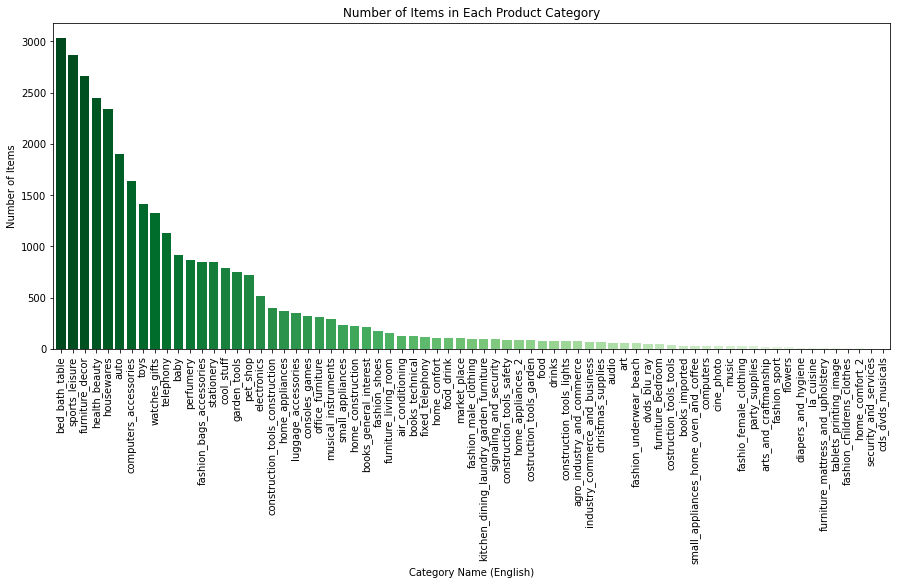

In [12]:
# Plot visualising the number of each items in the product categories
palette = sns.color_palette('Greens_r', n_colors=71) #set colours
plt.figure(figsize=(15,6))
new_product_data_translated['product_category_name_english'].value_counts().plot(kind='bar', width=0.8, color=palette);
plt.title('Number of Items in Each Product Category')
plt.xlabel('Category Name (English)')
plt.ylabel('Number of Items')
plt.show()

We can see that the distribution of different products across the categories is not even, so the next step is to find out what categories make up 50% of all products.

In [13]:
# Find which categories have the majority of all products
total_products = new_product_data_translated['product_id'].nunique() # Total number of products
category_counts = new_product_data_translated['product_category_name_english'].value_counts() # Number of products in each category
category_percentages = (category_counts / total_products) * 100 # Percentage of products in each category
cumulative_percentages = category_percentages.cumsum() # Cumulative sum of percentages
# Find the categories that make up 50% of all products
selected_categories = cumulative_percentages[cumulative_percentages <= 50].index.tolist()
# Print the selected categories
print(f"The categories that make up 50% of all products are: {', '.join(selected_categories)}.")

The categories that make up 50% of all products are: bed_bath_table, sports_leisure, furniture_decor, health_beauty, housewares, auto.


### Summary of the Products Dataset ###
* This dataset includes data about the products sold by Olist
* It links to the Order Items Dataset through the product_id
* Initially, there were 32951 rows and 9 columns
* Basic statistical computations gave no insight, as no valuable numerical values exist in the dataset
* We are only concerned with the following columns: product_id, product_category_name
* Product_id had no missing values, so no action was needed
* Dropped rows with missing values in the product_category_name, but left rows with missing values in product_weight_g, product_length_cm, product_height_cm, and product_width_cm, as this data isn't critical
* There are 71 unique product categories
* Using the translation file, the product_category_name was translated into English (product_category_name_english)
* New dataset has 32341 rows
* The Bed_bath_table category had the most items, and cds_dvds_musicals had the least amount of items
<br>_[Go to top](#top-of-page)_

<a id="b-sellers-dataset"></a>
## b) Sellers Dataset ##
Perform EDA on olist_sellers_dataset.csv

In [14]:
seller_data.head() # Displaying first 5 rows

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
seller_data.describe() # Basic statistical computations

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [16]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(seller_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(seller_data.info())

---Rows and columns:---
(3095, 4)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [17]:
seller_data.isnull().sum() # Sum of missing values for each column

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

From the steps above, we can see that all datatypes are correct, and there are no missing values, and the only numerical variable in this dataset is a zipcode.


Next, we would like to understand how many states and cities and states exist in the dataset.

In [18]:
# Count the number of unique values in the state and city columns
print("States:", seller_data['seller_state'].nunique())
print("Cities:", seller_data['seller_city'].nunique())

States: 23
Cities: 611


This shows us that sellers in our dataset are distributed across many different locations. Next, we would like to visualise how many sellers there are in each state.

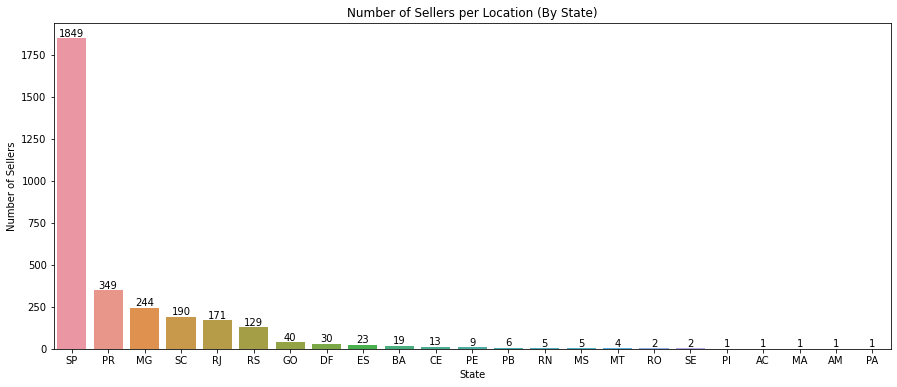

In [19]:
# Create count plot of the number of sellers from each state
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'seller_state', data = seller_data, order = seller_data['seller_state'].value_counts().index)
plt.title('Number of Sellers per Location (By State)')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
ax.bar_label(ax.containers[0])
plt.show()

The plot above shows us that the sellers in the dataset are not evenly distributed across Brazil, with 1849 sellers in São Paulo, 349 in Paraná, and 244 in Minas Gerais, making them the top three states by number of sellers. It also confirms that there are only 23 states with sellers, meaning that there are 4 states in Brazil that have no sellers. These states are Alagoas (AL), Amapá (AP), Roraima (RR), and Tocantins (TO).

### Summary of the Sellers Dataset ###
* The Seller Dataset holds data about the sellers that fulfilled orders made at Olist
* It links to the Order Item's Dataset through the seller_id, and the Geolocation Dataset through the zip_code_prefix
* This dataset has 3095 rows and 4 columns
* There are 3095 unique sellers in 611 cities and 23 states
* Basic statistical computations gave no insight, as no valuable numerical values exist relating to our tasks in this dataset
* There are no missing values, so no action is needed
* The state with the most sellers is SP (São Paulo) 
<br>_[Go to top](#top-of-page)_

<a id="c-customers-dataset"></a>
## c) Customers Dataset ##
Perform EDA on olist_customers_dataset.csv

In [20]:
customer_data.head() # Displaying first 5 rows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The overview of the customer dataset above shows us that the customer_id is used to link with the orders dataset, and each customer has a unique id to identify them across different orders.

In [21]:
customer_data.describe() # Basic statistical computations

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [22]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(customer_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(customer_data.info())

---Rows and columns:---
(99441, 5)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [23]:
customer_data.isnull().sum() # Sum of missing values for each column

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

As seen above, the only numerial value is a zip code (provides no insights), all data types are correct, and there are no missing values; therefore, we can proceed to the next steps.


We will now calculate plot the number of unique states and cities.

In [24]:
# Count the number of unique values in the state and city columns
print("States:", customer_data['customer_state'].nunique())
print("Cities:", customer_data['customer_city'].nunique())

States: 27
Cities: 4119


This tells us that there are customers located in every state in Brazil, and there are many different cities they are located in. To further explore this, we will visualise the number of customers for each state and the most popular cities in the dataset. 

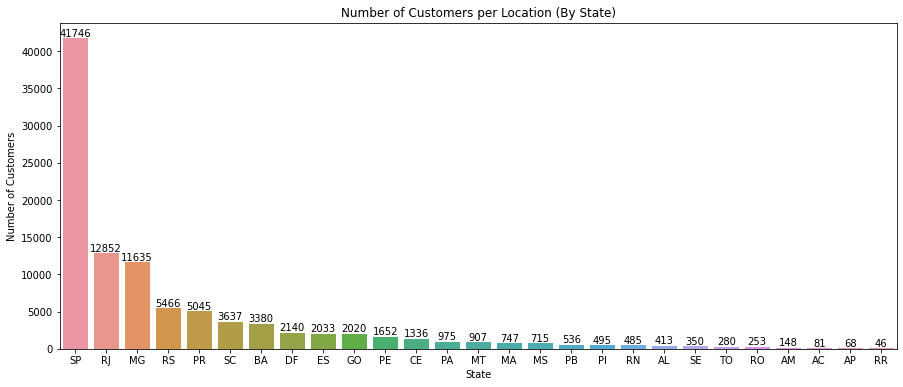

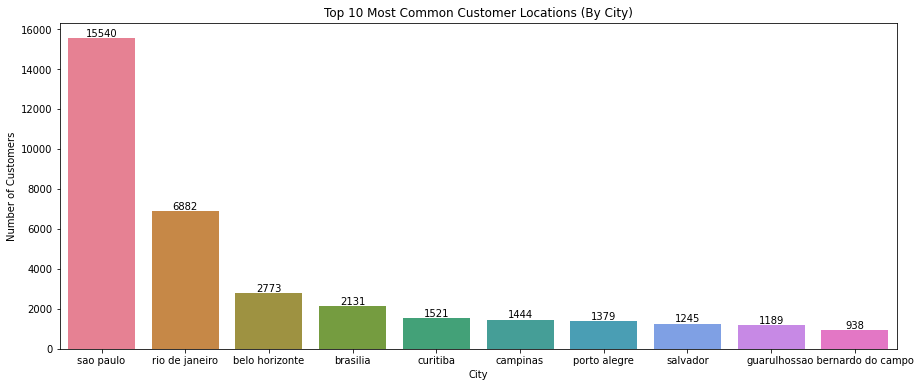

In [25]:
# Create count plot of the number of customers from each state
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'customer_state', data = customer_data, order = customer_data['customer_state'].value_counts().index)
plt.title('Number of Customers per Location (By State)')
plt.xlabel('State')
plt.ylabel('Number of Customers')
ax.bar_label(ax.containers[0])
plt.show()

# Create count plot of customer location by city 
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'customer_city', data = customer_data, palette="husl", order = customer_data['customer_city'].value_counts().head(10).index)
plt.title('Top 10 Most Common Customer Locations (By City)')
plt.xlabel('City')
plt.ylabel('Number of Customers')
ax.bar_label(ax.containers[0])
plt.show()

Similar to the seller dataset, the state of Sao Paulo has the largest presence in the dataset, accounting for almost half of all customers. Rio De Janeiro and Minas Gerais are the second and third largest states accounting for roughly 20% of all customers, highlighting that most customers are found within 3 main states.

The plot of customer cities also shows us that many of the customers within these states are located within the same city. However, a plot of the customer location data on a map would allow us to draw more definitive conclusions about the customers' location. 

The last process of exploring the customer dataset is calculating the number of repeat customers to gain an understanding of customer purchase patterns. To do this, we will first plot the number of orders placed by each customer.

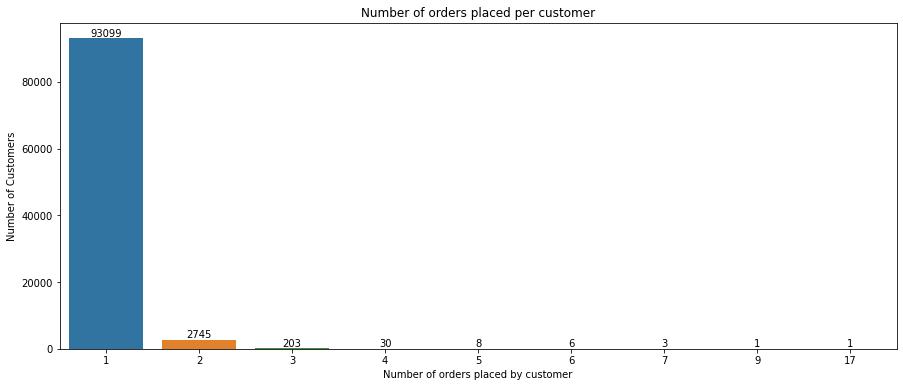

In [26]:
# Create DataFrame with the frequency that a customer's unique ID appears to calculate total orders
customer_purchase_frequency = customer_data.groupby('customer_unique_id').size().reset_index(name='frequency')

# Plot the number of purchases made by customers 
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'frequency', data = customer_purchase_frequency)
plt.title('Number of orders placed per customer')
plt.xlabel('Number of orders placed by customer')
plt.ylabel('Number of Customers')
ax.bar_label(ax.containers[0])
plt.show()

The plot above shows us that the vast majority of customers have only placed 1 order, with roughly 3% of customers making repeat purchases.

In [27]:
# Calculate repeat customers
repeat_customers = len(customer_purchase_frequency[customer_purchase_frequency['frequency'] > 1])
print("The total number of repeat_customers is: " + str(repeat_customers))

The total number of repeat_customers is: 2997


### Summary of the customers dataset ###
* This dataset has information about the customer and their location
* It links to the Geolocation Dataset through the zip_code_prefix, and the Orders Dataset through the customer_id
* This dataset has 99441 rows and 5 columns
* Basic statistical computations gave no insight, as no valuable numerical values exist relating to our tasks in this dataset
* There are no missing values, so no action is needed
* Like the sellers' dataset, the state with the most customers is SP (São Paulo) 
* There are very few repeat customers in the dataset, with ≈97% of customers only placing one order
<br>_[Go to top](#top-of-page)_

<a id="d-orders-dataset"></a>
## d) Orders Dataset ##
Perform EDA on olist_orders_dataset.csv

In [28]:
order_data.head() # Displaying first 5 rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
order_data.describe() # Basic statistical computations

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Looking briefly at the overview, it shows us that many crucial columns, such as order_id, customer_id and order_purchase_timestamp, do not have discrepancies. Although, in other columns, there are differences in the count, so there are some missing values. To get an overview of this, we will later calculate the number of null values, but for now, we will observe the columns and their data types.

In [30]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(order_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(order_data.info())

---Rows and columns:---
(99441, 8)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


The information above highlighted that all the timestamp columns are the incorrect datatype, so we will now convert them to a suitable datetime data type.

In [31]:
# Convert the 'object' columns to datetime64 data type
# list of columns to convert
order_data_cols_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                            'order_delivered_customer_date', 'order_estimated_delivery_date']

# loop through each column and convert to datetime64
for col in order_data_cols_to_convert:
    order_data[col] = pd.to_datetime(order_data[col]) 
order_data.info() # show summary of new data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Now that the columns have suitable datatypes, we can once again view the statistical overview of the order data set.

In [32]:
order_data.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


This overview of timestamp columns gives us valuable information, such as the timeframe of orders that have been placed and that the data collection started in September 2016, and the final order recorded was in October 2018. As mentioned previously, some columns are missing values, so we will calculate the total null values in the data set.

Next, let's look at the missing values.

In [33]:
order_data.isnull().sum() # Sum of missing values for each column

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Whilst there may be 3 columns with several null values, these columns aren't needed for our purposes, so they do not need to be removed. 

Even though we decided not to use these columns, there might be valuable insight we can later use to judge reviews. For example, if the sellers take a long time to deliver an order, the customer will likely give a bad rating. Therefore, we will investigate the number of days it took from the point of ordering to the delivery time.

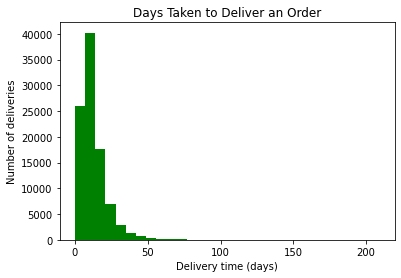

In [34]:
# Plot number of days taken to deliver orders
order_data['delivery_time'] = order_data['order_delivered_customer_date'] - order_data['order_purchase_timestamp']
plt.hist(order_data['delivery_time'].dt.days, bins=30, color='green')
plt.title('Days Taken to Deliver an Order')
plt.xlabel('Delivery time (days)')
plt.ylabel('Number of deliveries')
plt.show()

In [35]:
# Calculate the difference between order placed and order delivered and create new column
order_data['delivery_time'] = order_data['order_delivered_customer_date'] - order_data['order_purchase_timestamp']
print("The average number of days taken to deliver an order is: " 
      + str(order_data['delivery_time'].mean().days)) # calculate the mean

The average number of days taken to deliver an order is: 12


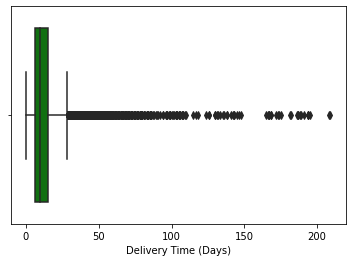

In [36]:
# Create boxplot of delivery time
sns.boxplot(x=order_data['delivery_time'].dt.days, color='green')
plt.xlabel('Delivery Time (Days)')
plt.show()

Upon further investigation of the delivery days, we found that outliers heavily influence the calculated average number of days it took to deliver an order. The majority of orders, however, were delivered within 25 days.

Next, to gain a deeper understanding of the order purchases over time, we decided to plot the number of purchases made in each month and each week of the year.

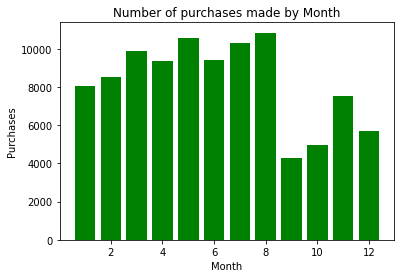

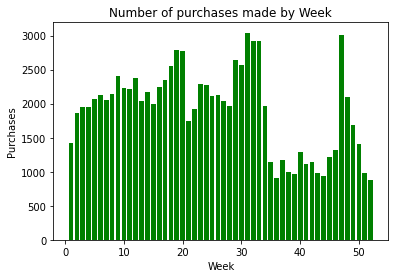

In [37]:
# Plot out the count of purchase month
order_data_month = pd.DataFrame({'month': order_data['order_purchase_timestamp'].dt.month}) # extract month column
month_counts = order_data_month['month'].value_counts() # count the occurrences of each month

# Create a bar chart of the month counts
fig, ax = plt.subplots()
ax.bar(month_counts.index, month_counts.values, color='green')
ax.set_xlabel('Month')
ax.set_ylabel('Purchases')
plt.title('Number of purchases made by Month')
plt.show()

# Plot out the count of purchase week
order_data_week = pd.DataFrame({'week': order_data['order_purchase_timestamp'].dt.isocalendar().week}) # extract week column
week_counts = order_data_week['week'].value_counts() # count the occurrences of each week

# Create a bar chart of the week counts
fig, ax = plt.subplots()
ax.bar(week_counts.index, week_counts.values, color='green')
ax.set_xlabel('Week')
ax.set_ylabel('Purchases')
plt.title('Number of purchases made by Week')
plt.show()

These plots show that there are significantly fewer orders placed in September and October, but this is likely due to when the data started being collected and when data stopped being collected. To gain a complete view of the order history and its patterns, we plotted the data without aggregating years.

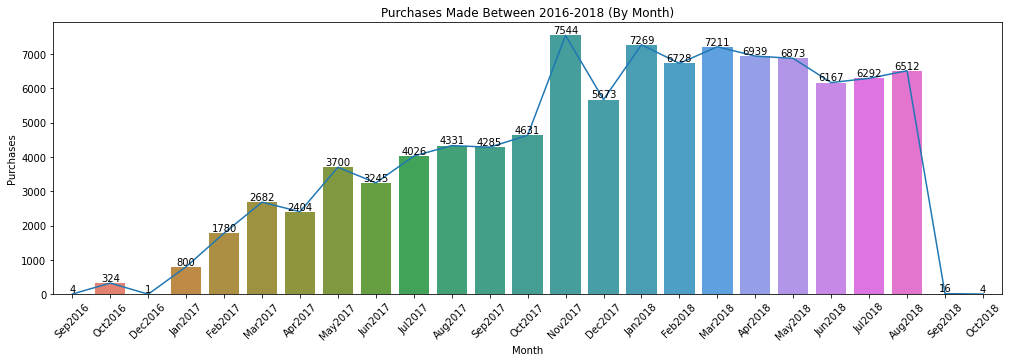

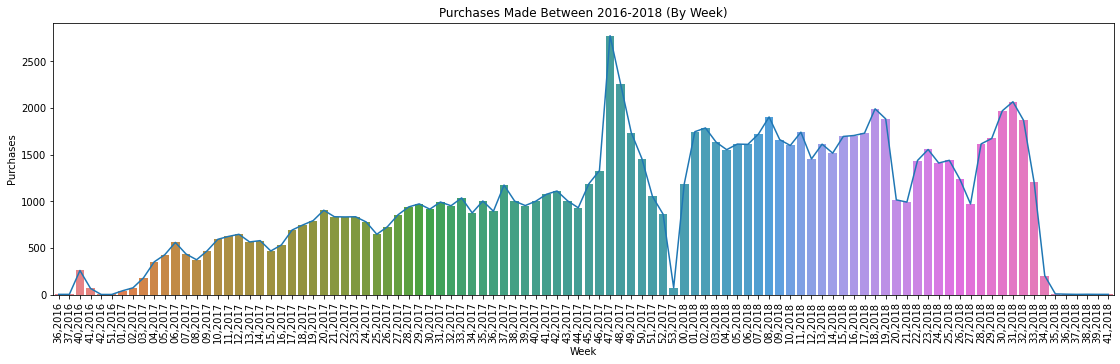

In [38]:
# Create plot of count purchases of each month in data set 
plt.figure(figsize=(17,5))
full_month_data=order_data
full_month_data = full_month_data.sort_values(by=['order_purchase_timestamp'])
full_month_data = full_month_data['order_purchase_timestamp'].dt.strftime('%b%Y')
plt.xticks(rotation=45)

#Line plot
ax = sns.lineplot(data=full_month_data.value_counts(sort=False))
ax = sns.countplot(data=full_month_data, x=full_month_data, palette="husl")
ax.bar_label(ax.containers[0])
plt.title('Purchases Made Between 2016-2018 (By Month)')
ax.set_xlabel('Month')
ax.set_ylabel('Purchases')
plt.show()

# Create plot of count purchases of each week in data set 
plt.figure(figsize=(19,5))
full_week_data=order_data
full_week_data = full_week_data.sort_values(by=['order_purchase_timestamp'])
full_week_data = full_week_data['order_purchase_timestamp'].dt.strftime('%U,%Y')
plt.xticks(rotation=90)

#Line plot
ax = sns.lineplot(data=full_week_data.value_counts(sort=False))
ax = sns.countplot(data=full_week_data, x=full_week_data, palette="husl")
plt.title('Purchases Made Between 2016-2018 (By Week)')
ax.set_xlabel('Week')
ax.set_ylabel('Purchases')
plt.show()

These plots confirm that the data was skewed by aggregating the 3 years together, but it does provide us with only one whole year to conclude from. The data also shows a general increase in sales over time, with a steady rise from the beginning of 2017 until a significant spike in late November, very likely due to Black Friday sales in Brazil and a general increase in purchases leading up to Christmas. Although, the data has several outliers, probably due to how the data has been collected or other possible external factors that we need further context to understand.

Next, we will try to understand the order statuses. When viewing the data types of the columns earlier, we could see that the order_status column needs to be converted to the categorical data type so we can easily manipulate the data.

In [39]:
# Convert order_status to a categorical variable
order_data['order_status'] = order_data['order_status'].astype('category')
order_data['order_status'].dtype # print the data type of the order status column

CategoricalDtype(categories=['approved', 'canceled', 'created', 'delivered', 'invoiced',
                  'processing', 'shipped', 'unavailable'],
, ordered=False)

In [40]:
# Count the values in the 'order_status' column
order_data['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

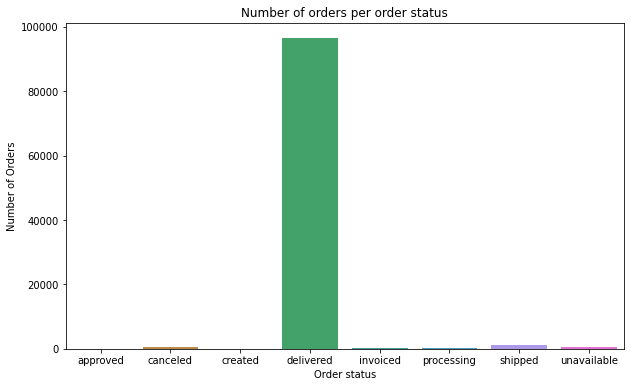

In [41]:
# Create count plot for one column
plt.figure(figsize=(10,6))
sns.countplot(x='order_status', data=order_data, palette="husl")
plt.title('Number of orders per order status')
plt.xlabel('Order status')
plt.ylabel('Number of Orders')
plt.show()

As the plot above shows, the majority of orders in the dataset have been delivered. This causes the other variables not to be visible, so the next step was to create the same plot, only with the delivered column excluded, so different statuses could be investigated.

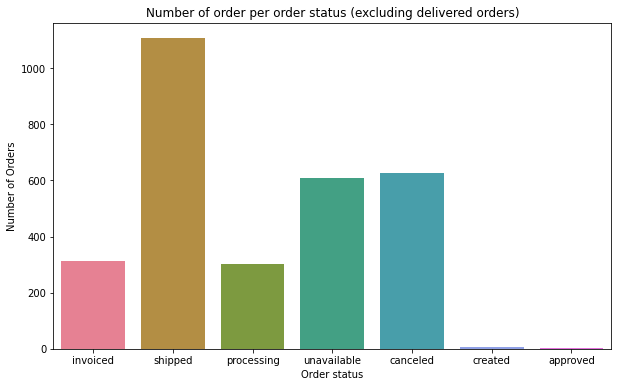

In [42]:
# Set figure size, cast categorical data back to object to remove delivered data, then plot count status of remaining data
plt.figure(figsize=(10,6))
order_data_filtered = order_data['order_status'].astype('object')
order_data_filtered = order_data_filtered[order_data_filtered != 'delivered']
sns.countplot(data=order_data_filtered, x=order_data_filtered, palette="husl")
plt.title('Number of order per order status (excluding delivered orders)')
plt.xlabel('Order status')
plt.ylabel('Number of Orders')
plt.show()

After delivered, the next highest status is shipped, with over 1000 orders being shipped when the data was taken. Next is cancelled, followed closely by unavailable Order status.

Next, we will plot the display the distribution of number of purchases by year to understand what years were strong / weak.

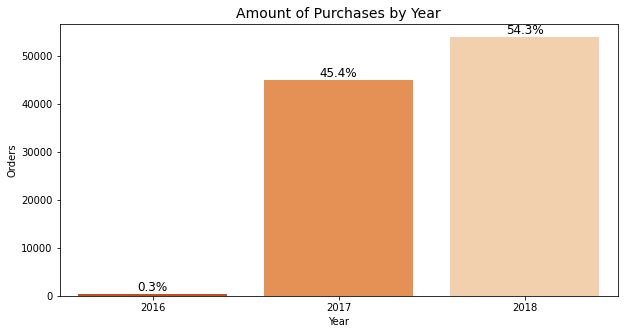

In [43]:
# Plot online purchase by years
order_data['order_purchase_year'] = order_data['order_purchase_timestamp'].apply(lambda x: x.year)
order_data['order_purchase_month'] = order_data['order_purchase_timestamp'].apply(lambda x: x.month)
order_data['order_purchase_dayofweek'] = order_data['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='order_purchase_year', data=order_data, palette='Oranges_r')
ncount = len(order_data)
for p in ax.patches:
 x=p.get_bbox().get_points()[:,0]
 y=p.get_bbox().get_points()[1,1]
 ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom', size=12)
ax.set_title('Amount of Purchases by Year', size=14)
ax.set_ylabel('Orders')
ax.set_xlabel('Year')
plt.show()

We can see that 54.3% of the total sales were made in 2018, 45.4% in 2017 and less than 1% in 2016. 

### Summary of the Orders Dataset ###
* This dataset is the core dataset.
* It links to the Order Reviews Dataset, Order Payments Dataset, and the Order Items Dataset through the order_id, and links to the Order Customer Dataset through the customer_id
* This dataset has 99441 rows and 8 columns
* order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date all have missing values
* The object data types were converted to datetime64 (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)
* Describe was done twice to show the impact of the change above
* The average delivery time is 12 days, but there are some outliers
* Orders are rising from January to August, with a significant drop in September; another increase in November compared to the last tertial. This could be because most schools in Brazil start their academic year in February, and they have a winter break in July
* A week in November has the highest amount of purchases, which could be because of Christmas, a general sale or because of Black Friday
* There are 96478 delivered orders, 1107 shipped orders, 625 cancelled orders, 5 created orders, and 2 approved orders
* 54.3% of the total sales were made in 2018, 45.4% in 2017 and less than 1% in 2016
<br>_[Go to top](#top-of-page)_

<a id="e-order-items-dataset"></a>
## e) Order Items Dataset ##
Perform EDA on olist_order_items_dataset.csv

In [44]:
order_items_data.describe() # Basic statistical computations

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [45]:
order_items_data.head() # Displaying first 5 rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The basic statistical breakdown here shows us that most orders only contain one item as the mean order_item_id is 1.2, and there is minimal deviation within the dataset. There are very large differences in the price of items, though, with bought products ranging from 0.8 Brazilian Real (≈£0.15) all the way up to 6735 Brazilian Real (≈£1050). The final column here, the freight value, shows that most orders have a delivery of around 20 Brazilian Real. Still, there are likely some outliers as the maximum value reaches 409. We will investigate this later in the chapter.

In [46]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(order_items_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(order_items_data.info())

---Rows and columns:---
(112650, 7)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


When viewing the data types of the columns, there is once again a timestamp column that needs to be converted to a more suitable datetime type.

In [47]:
# Convert the 'shipping_limit_date' column to a datetime datatype
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'])
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Now that all the values have suitable data types, we can check to see if there are any null values within the data set.

In [48]:
order_items_data.isnull().sum() # Sum of missing values for each column

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

There are no null values to deal with, so we will now look at the distribution of item prices by plotting a histogram.

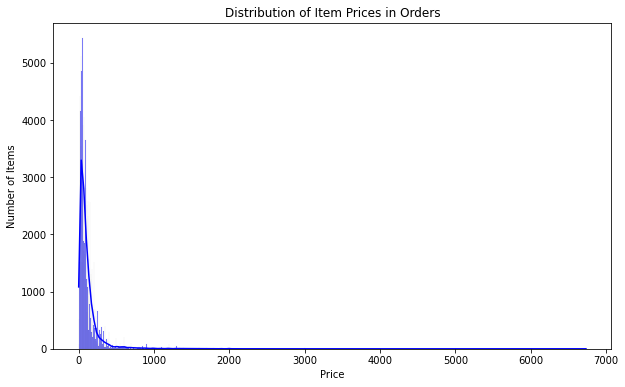

In [49]:
# Plot histogram of price of items
plt.figure(figsize=(10,6))
sns.histplot(data=order_items_data, x='price', kde=True, color='blue')
plt.title('Distribution of Item Prices in Orders')
plt.xlabel('Price')
plt.ylabel('Number of Items')
plt.show()

The histogram shows an abundance of items purchased for 0-100 Real, with relatively few items greater than 350, and a few outliers that have been purchased for 500+ Real. 

The next column we will look at is the order_item_id, showing how many items are included in an order.

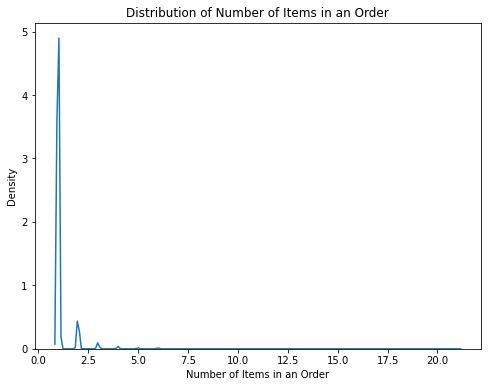

In [50]:
# Pick the highest order_item_id for each order to remove duplicate orders for distribution
order_item_id_refined = order_items_data.groupby('order_id')['order_item_id'].max().reset_index()
# Plot density of order_item_ids
plt.figure(figsize=(8,6))
sns.kdeplot(x='order_item_id', data=order_item_id_refined)
plt.title('Distribution of Number of Items in an Order')
plt.xlabel('Number of Items in an Order')
plt.ylabel('Density')
plt.show()

The histogram highlights how virtually all of the orders in the data set comprise of 1 item, with the majority remaining orders containing 2-4 items.


In order to manipulate the order_items in English, we will merge order_items_data, and new_proudct_data_translated.

In [51]:
# Match product ids to product categories
order_items_matched = pd.merge(order_items_data, new_product_data_translated, on='product_id') # merge the two datasets
#print(order_items_matched) # the merged dataset now has both the Portuguese and English columns

# count the number of unique values in the 'Name' column
order_items_unique_categories = order_items_matched['product_category_name_english'].nunique()
print(f"The number of unique values in the 'product_category_name_english' column is {order_items_unique_categories}")

The number of unique values in the 'product_category_name_english' column is 71


This tells us that each of the 71 categories from the category dataset is represented in at least one order. Now we will plot the number of purchases from each category to visualise the popularity of categories among customers.

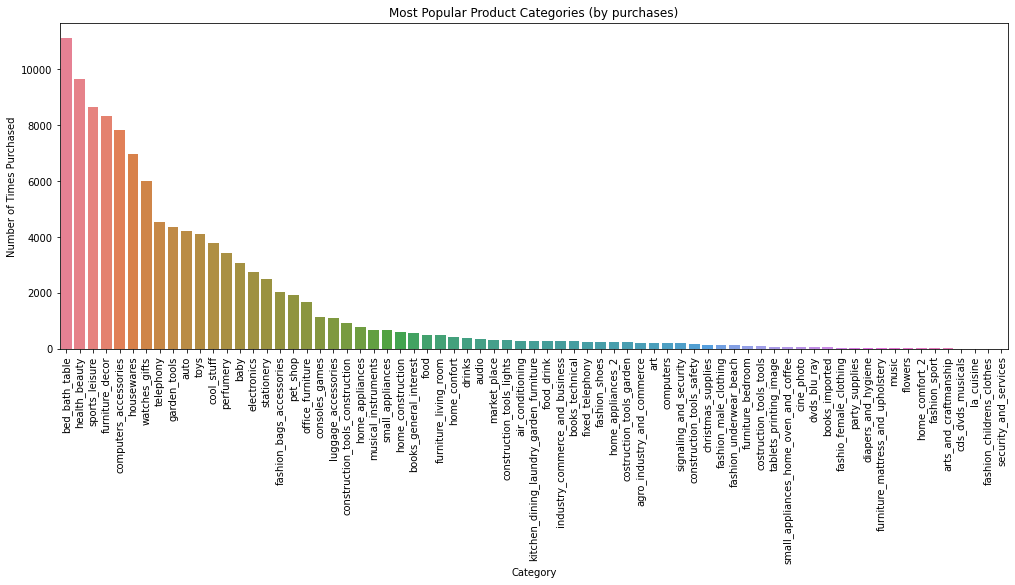

In [52]:
# Merge the english category translations to order_items data
merged_data = pd.merge(order_items_data, new_product_data_translated, on='product_id')

# Plot the 20 top most purchased categories
plt.figure(figsize=(17, 6))
ax = sns.countplot(x = 'product_category_name_english', data = merged_data, palette="husl", order = merged_data['product_category_name_english'].value_counts().index)
plt.title('Most Popular Product Categories (by purchases)')
plt.xlabel('Category')
plt.ylabel('Number of Times Purchased')
plt.xticks(rotation=90)
plt.show()

This plot is very similar to the plot of products in each category (from chapter A). The top categories are roughly alike in both plots, albeit in a slightly different order. This is to be expected as it is likely that the more products you have in a specific category, the more items you will sell from said category.

Now we will plot the individual items to see which are most frequently purchased by customers.

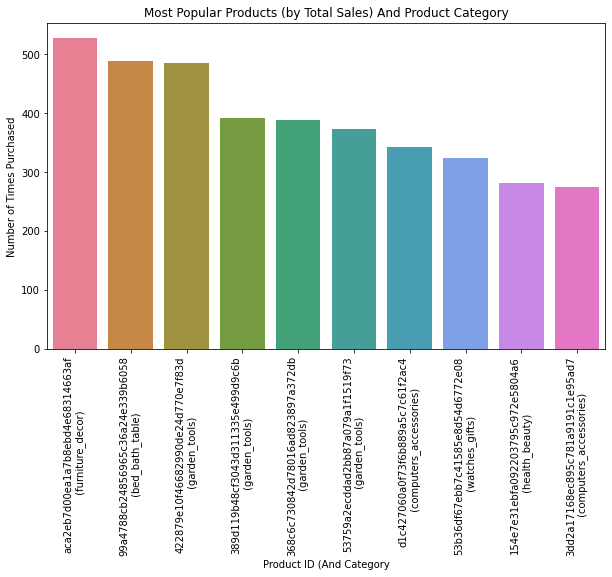

In [53]:
# Concatenate item and product category to make it more understandable in final plot
merged_data['product_concat'] = merged_data.apply(lambda row: row['product_id'] + '\n (' + row['product_category_name_english'] + ')', axis=1)

# Plot the most purchased individual items
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'product_concat', data = merged_data, palette="husl", order = merged_data['product_concat'].value_counts().head(10).index)
   
plt.title('Most Popular Products (by Total Sales) And Product Category')
plt.xlabel('Product ID (And Category')
plt.ylabel('Number of Times Purchased')
plt.xticks(rotation=90)
plt.show()

Compared to the previous plot, the over-representation of garden tools suggests that some popular items within the category make up most of the sales. In contrast, other categories have more evenly distributed sales per item.

### Summary of the Order Items Dataset ###
* This dataset includes data about the items purchased within each order
* It links to three other datasets, the Products Dataset through the product_id, the Orders Dataset through the order_id, and the Sellers Dataset through the seller_id
* This dataset has 112650 rows and 7 columns
* The majority of the orders contain just 1 item
* There are large differences in the price of items
* Most orders have a delivery of around 20 Brazilian Real
* There are no missing values
* We converted shipping_limit_date to a datetime64 data type
<br>_[Go to top](#top-of-page)_

<a id="f-order-payments-dataset"></a>
## f) Order Payments Dataset ##
Perform EDA on olist_order_payments_dataset.csv

In [54]:
order_payments_data.head() # Displaying first 5 rows

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [55]:
order_payments_data.describe() # Basic statistical computations

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


The basic statistical breakdown here shows us that most customers paid in 2 to 3 instalments and in 1 sequential. It also shows us that the average payment value was 154.1, with a maximum of 13664.08 and a minimum of 0. The 0 could be because of vouchers.

In [56]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(order_payments_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(order_payments_data.info())

---Rows and columns:---
(103886, 5)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


When viewing the data types of the columns, we can see that the payment_type column needs to be converted to the categorical data type so we can easily manipulate the data later on.

In [57]:
# Convert payment_type to categorical data type
order_payments_data['payment_type'] = order_payments_data['payment_type'].astype('category')
order_payments_data['payment_type'].dtype # print the data type of the order status column

CategoricalDtype(categories=['boleto', 'credit_card', 'debit_card', 'not_defined',
                  'voucher'],
, ordered=False)

Now that all the values have suitable data types we can check to see if there are any null values within the data set.

In [58]:
order_payments_data.isnull().sum() # Sum of missing values for each column

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

There are no null values to deal with, so we will now look at the frequency of each payment type by plotting a bar and a pie charts.

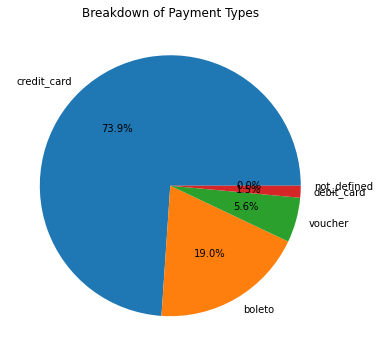

In [59]:
# Plot pie chart of payment type
pieChart = order_payments_data['payment_type'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(pieChart,labels = pieChart.index, autopct='%1.1f%%')
plt.title("Breakdown of Payment Types")
plt.show()

We can see that almost 74% orders were paid using a credit card. Meanwhile, almost 75% of orders were paid for using a cheque or a voucher. 

### Summary of the Order Payments Dataset ###
* This dataset includes data about the orders payment options
* It only links to one other dataset, the Orders Dataset through the order_id
* This dataset has 103886 rows and 5 columns
* We converted payment_type into a categorical data type
* Most customers paid in 2 to 3 installments and 1 sequential
* The average payment value was 154.1
* Almost 74% orders were paid using a credit card
* There are no missing values
* The majority of orders were paid by credit card
<br>_[Go to top](#top-of-page)_

<a id="g-order-reviews-dataset"></a>
## g) Order Reviews Dataset ##
Perform EDA on olist_order_reviews_dataset.csv

In [60]:
order_reviews_data.head() # Displaying first 5 rows

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,received it well before the stipulated time.,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations Lannister stores I loved shopp...,01/03/2018 00:00,02/03/2018 10:26


From displaying the first few rows, we can see that some values are null, especially in the review comment title (only 11715 non-null). We will investigate these later in the chapter.

In [61]:
order_reviews_data.describe() # Basic statistical computations

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


The average rating is 4.07, which is very positive. As expected, the minimum rating is 1 star, and the maximum is 5. Only 25% of reviews are smaller than or equal to 4-star rating. Moreover, two timestamp variables must be converted from object to datetime to avoid downstream errors.

In [62]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(order_reviews_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(order_reviews_data.info())

---Rows and columns:---
(100000, 7)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41744 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


There are 100000 reviews in the dataset. There are two timestamps that are of the incorrect data type, we will convert these later. There are also missing values in the comment title and comment message columns, which we will explore further now.

In [63]:
order_reviews_data.isnull().sum() # Sum of missing values for each column

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58256
review_creation_date           0
review_answer_timestamp        0
dtype: int64

We can see missing values in both the review_comment_title and review_comment_message. We will drop these separately as both will be used in Subtask 5: Sentiment Analysis.

In [64]:
# Drop na values from review_comment_title and review_comment_message 
order_reviews_data_message_dropna = order_reviews_data.dropna(subset=['review_comment_message'])
#order_reviews_data_title_dropna = order_reviews_data.dropna(subset=['review_comment_title'])
order_reviews_data_message_dropna.info()
#order_reviews_data_title_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 3 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                41744 non-null  object
 1   order_id                 41744 non-null  object
 2   review_score             41744 non-null  int64 
 3   review_comment_title     9985 non-null   object
 4   review_comment_message   41744 non-null  object
 5   review_creation_date     41744 non-null  object
 6   review_answer_timestamp  41744 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


We have now dropped the NaN values from the two columns, and we can proceed to converting timestamps. However, we will use the original data frame for further analysis in this chapter, as it provides valuable insight into the actual star ratings for which we don't mind the missing values, and using the 100k entries will provide higher accuracy.

In [65]:
# Convert review_creation_date and review_answer_timestamp to datetime64 datatype
order_reviews_data_cols_to_convert = ['review_creation_date', 'review_answer_timestamp'] # List of columns to convert

# Loop through each column and convert to datetime64
for col in order_reviews_data_cols_to_convert:
    order_reviews_data[col] = pd.to_datetime(order_reviews_data[col], dayfirst=True) 
order_reviews_data.info() # Show summary of new data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41744 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Now that missing values and timestamps are dealt with, we can plot a pie chart to visualise the review scores.

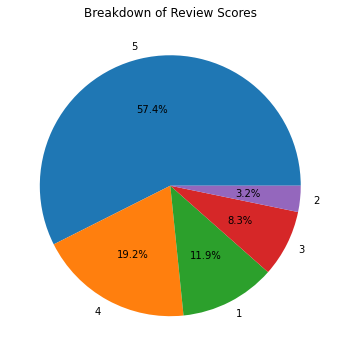

In [66]:
# Plot pie chart of the review scores 
pieChart = order_reviews_data['review_score'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(pieChart,labels = pieChart.index, autopct='%1.1f%%')
plt.title("Breakdown of Review Scores")
plt.show()

The visualisation supported what the numbers suggested, with 5 star review being the most present. However, we can see that there are quite a lot of 1 star reviews, which are more present than 2 or 3 star. We will investigate what this means for the customer satisfaction later.

### Summary of the Order Reviews Dataset ###
* This dataset includes data about the reviews made by the customers
* It only links to one other dataset, the Orders Dataset through the order_id
* This dataset has 100000 rows and 7 columns
* We dropped the NaN values from review_comment_title and review_comment_message, as they are needed for Subtask: 5 
* The 5 stars reviews are the most frequent, just over 50%, but the mean of all the reviews is 4 stars
<br>_[Go to top](#top-of-page)_

<a id="h-geolocation-dataset"></a>
## h) Geolocation Dataset ##
Perform EDA on olist_geolocation_dataset.csv

In [67]:
geolocation_data.head() # Displaying first 5 rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [68]:
geolocation_data.describe() # Basic statistical computations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [69]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(geolocation_data.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(geolocation_data.info())

---Rows and columns:---
(1000163, 5)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [70]:
geolocation_data.isnull().sum() # Sum of missing values for each column

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

From the steps above, we can see that all columns are the correct data type, and there are no missing values. The statistics show the geolocation values, however, they are hard to read and virtually mean nothing to us, so we will now plot the geolocation data on a map to understand it more.

A plot of the geolocation will show where the customers are located. This will help understand any trends which may arise in certain parts of the world or trends by country.

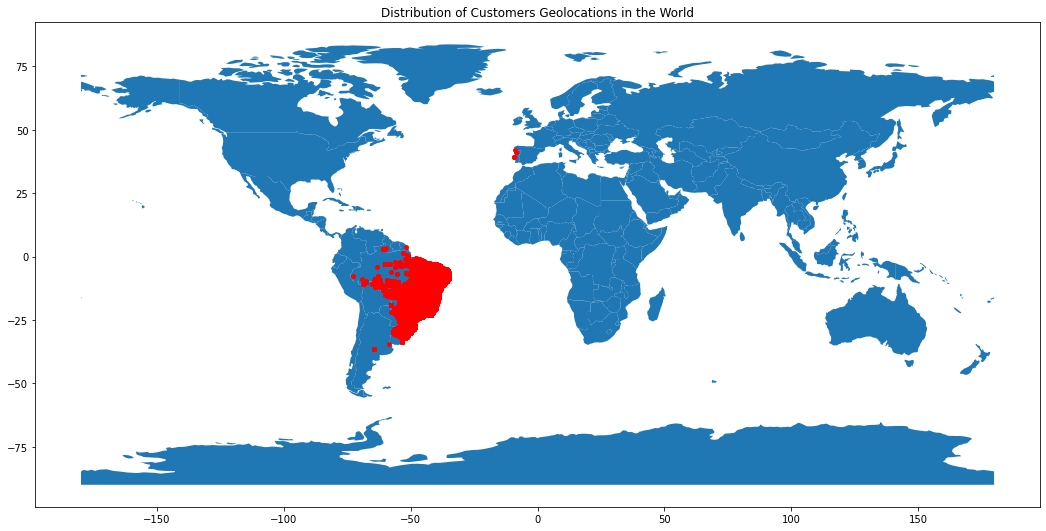

In [71]:
# Map showing the distribution of customers geolocations in the world
# Get the coordinates of each zip code prefix
geolocation_unique = geolocation_data.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
# Merge the zip code coordinates with the customers zip code
customer_coords = pd.merge(customer_data, geolocation_unique, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")

geometry = [Point(xy) for xy in zip(customer_coords['geolocation_lng'], customer_coords['geolocation_lat'])]
gdf = GeoDataFrame(customer_coords, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(18, 12)), marker='o', color='red', markersize=15);
ax.set_title("Distribution of Customers Geolocations in the World")
plt.show()

This map showing the distribution of customers' geolocations in the world suggests that most customers are based in Brazil, with a few in other South-American countries like Argentina, and a few in Portugal.

Next, we will create a density map of customers and their locations.

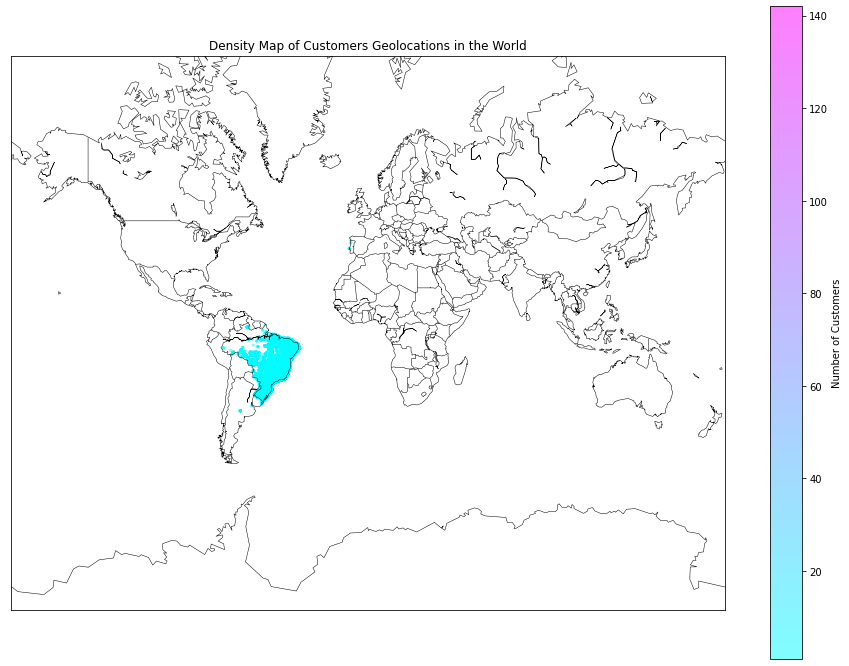

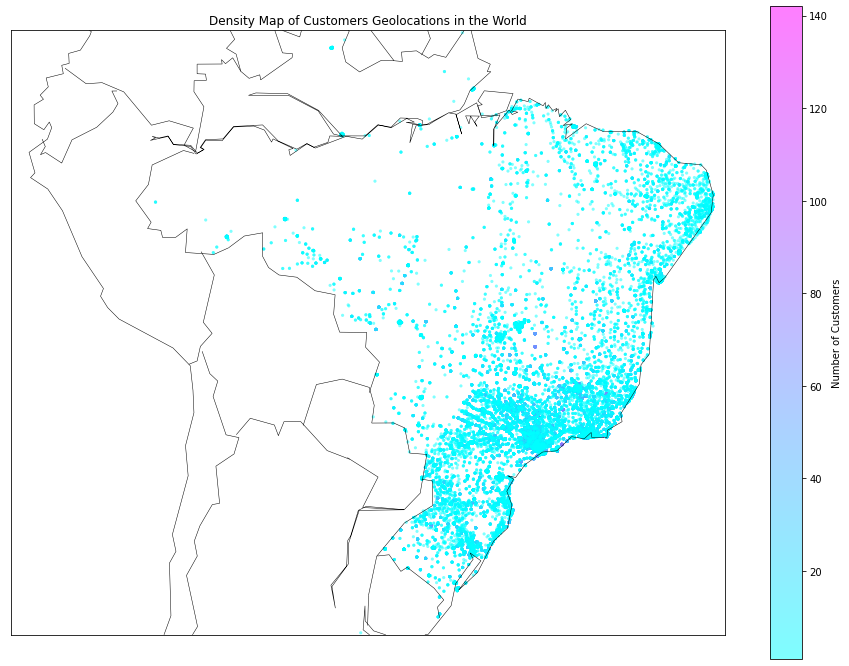

In [72]:
# Get the coordinates of each zip code prefix.
geolocation_unique = geolocation_data.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
# Merge the zip code coordinates with the customers zip code
customer_coords = pd.merge(customer_data, geolocation_unique, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")

# Count the number of occurrences of each pair of coordinates
customer_coords['count'] = customer_coords.groupby(['geolocation_lat', 'geolocation_lng'])['customer_unique_id'].transform('count')
# Sort customers, so that the density map works.
customer_coords = customer_coords.sort_values(by='count', ascending=False)

def drawDensityMap(llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180):
    m = Basemap(projection='merc',llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,lat_ts=20,resolution='c')
    x, y = m(customer_coords['geolocation_lng'].values, customer_coords['geolocation_lat'].values)

    fig = plt.figure(figsize=(16, 12)) # set figure size

    # Plot the points and color them based on their count
    m.scatter(x, y, s=10, c=customer_coords['count'], cmap='cool', alpha=0.5, linewidths=0.000000000001)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    
    plt.colorbar(label='Number of Customers') # add color bar
    plt.title('Density Map of Customers Geolocations in the World')
    plt.show()
    
drawDensityMap() # show map
drawDensityMap(llcrnrlat=-34.7,urcrnrlat=4,llcrnrlon=-82.5,urcrnrlon=-34) # zoom in

These two maps show the density of customers in Brazil. It shows that most customers are located alongside the coast of Brasil and that higher density areas correlate with populous cities.

### Summary of the Geolocation Dataset ###
* This dataset includes data about zip code prefixes and subsequent locations
* This dataset serves as additional information about locations
* It links to two other datasets, the Customers and the Sellers datasets, through the zip_code_prefix
* This dataset has 1000163 rows and 5 columns
* Basic statistical computations gave no insight as no useful numerical values exist in this dataset
* Almost all customers are based in Brazil, with a few in Portugal and Argentina
* This dataset has no missing values
<br>_[Go to top](#top-of-page)_

<a id="2-general-insights"></a>
# General Insights #
Exploration of two-variable relationships.

<a id="2a-order-items-and-prices-analysis"></a>
## a) Order Items and Prices Analysis ##
Visualising correlations between the purchased items, their prices, and their locations helps understand the business's operations.

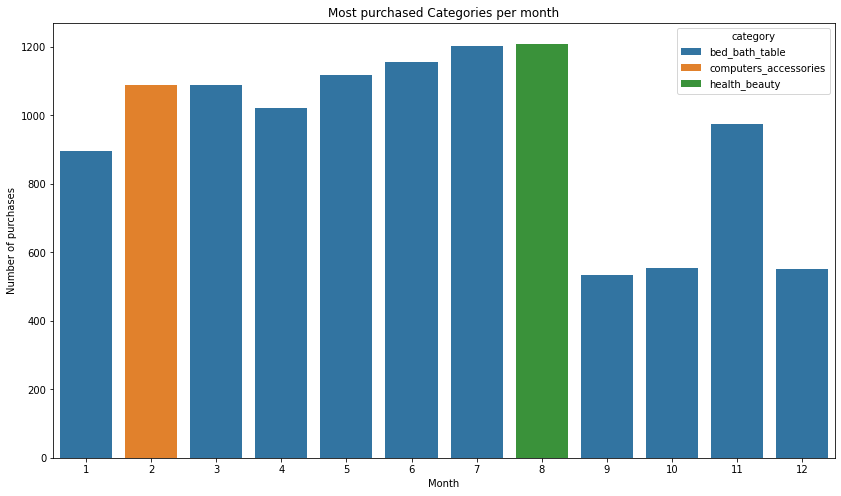

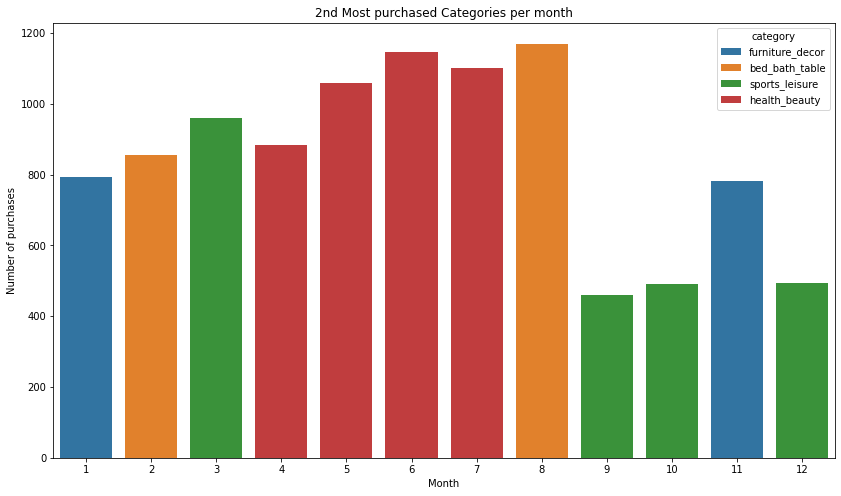

In [73]:
# Merge datasets
merged_data = pd.merge(order_items_data, new_product_data_translated, on='product_id')
merged_data = pd.merge(merged_data, order_data, on='order_id')
merged_data = pd.merge(merged_data, customer_data, on='customer_id')

columns = ['price', 'product_category_name_english', 'order_purchase_timestamp']
price_df = merged_data[columns]
new_price_df = price_df.copy()
new_price_df['order_month'] = pd.DataFrame({'month': price_df['order_purchase_timestamp'].dt.month})
new_price_df = new_price_df.drop('order_purchase_timestamp', axis=1)

most_popular_category_per_month = pd.DataFrame()
second_most_popular_category_per_month = pd.DataFrame()

# Calculate most and second most popular
x=1

while x < 13:
    orders = new_price_df[new_price_df['order_month'] == x]
    a = orders['product_category_name_english'].value_counts()
    new_row = pd.DataFrame({'category': [a.index[0]], 'order_month': [x], 'count': [a[0]]})
    new_row2 = pd.DataFrame({'category': [a.index[1]], 'order_month': [x], 'count': [a[1]]})
    most_popular_category_per_month = pd.concat([most_popular_category_per_month, new_row])
    second_most_popular_category_per_month = pd.concat([second_most_popular_category_per_month, new_row2])
    
    x=x+1

# Plot most purchased categories per month
plt.figure(figsize=(14,8))
sns.barplot(data=most_popular_category_per_month, y='count', x='order_month', hue='category', dodge=False, palette="tab10")
plt.title("Most purchased Categories per month")
plt.xlabel("Month")
plt.ylabel("Number of purchases")
plt.show()

# Plot second most purchased categories per month 
plt.figure(figsize=(14,8))
sns.barplot(data=second_most_popular_category_per_month, y='count', x='order_month', hue='category', dodge=False, palette="tab10")
plt.title("2nd Most purchased Categories per month")
plt.xlabel("Month")
plt.ylabel("Number of purchases")
plt.show()

The first bar plot above shows the most popular categories for each month (combined). We can see that in 10 out of 12 months (except February and August), the most popular category is bed_bath_table, which correlates with our previous findings. Because of this, the second most popular purchased category is displayed in the second graph. For February and August, the bed_bath_table category is the most purchased. Other popular categories are health_beauty and sports_leisure.

However, after investigating these two graphs, we realised there might be better ways to display this issue. Therefore, the line plot below was used to show the most purchased categories per month.

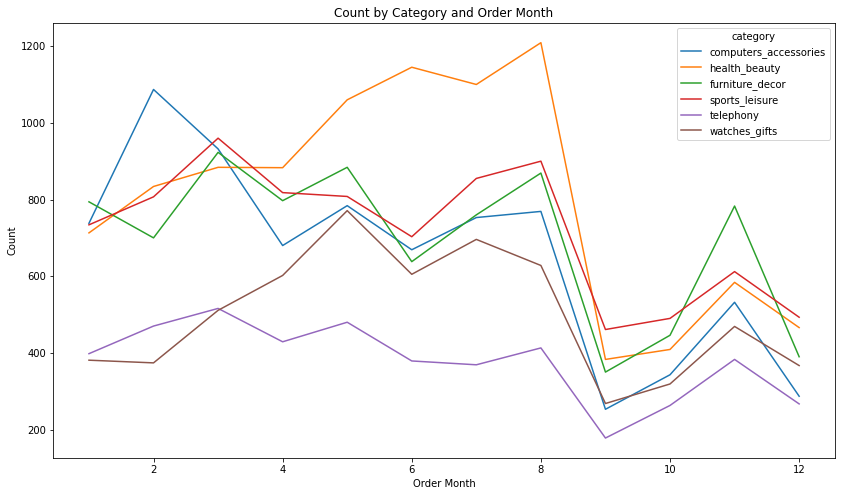

In [74]:
x=1
y=1

while x < 13:
    orders = new_price_df[new_price_df['order_month'] == x]
    a = orders['product_category_name_english'].value_counts()
    y=1
    #print(a.size)
    while (y < a.size):
        new_row = pd.DataFrame({'category': [a.index[y]], 'order_month': [x], 'count': [a[y]]})
        most_popular_category_per_month = pd.concat([most_popular_category_per_month, new_row])
        y=y+1
    
    x=x+1
    
keep_categories = ['furniture_decor', 'sports_leisure', 'health_beauty', 'watches_gifts', 'telephony', 'computers_accessories']

# select only the rows where category is in the keep_categories list
most_popular_category_per_month = most_popular_category_per_month.reset_index(drop=True) # reset index so as not to cause indexing error
most_popular_category_per_month = most_popular_category_per_month.loc[most_popular_category_per_month['category'].isin(keep_categories)]

plt.figure(figsize=(14,8))

sns.lineplot(data=most_popular_category_per_month, x='order_month', y='count', hue='category')

# add title and labels to the plot
plt.title('Count by Category and Order Month')
plt.xlabel('Order Month')
plt.ylabel('Count')

# display the plot
plt.show()

The line chart above shows the number of items purchased for each month (combined) and the item's category. Generally, the item categories seem to have quite a similar number of purchases relative to each other, except for the health & beauty category, which had a significant increase from April through August.

Next, we will investigate the number of orders made and revenue generated per state.

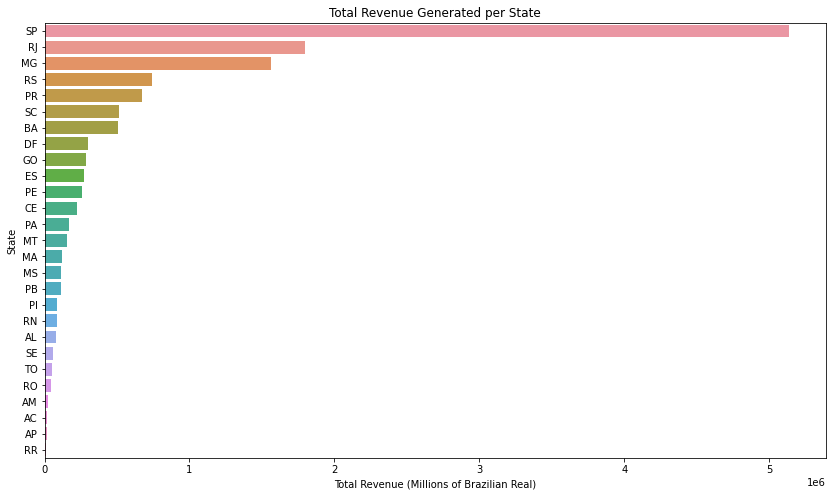

In [75]:
# Plot total revenue generated per state, exluding the freight value (only using item price)
columns = ['price', 'customer_state']
revenue_df = merged_data[columns]
grouped_data = revenue_df.groupby('customer_state')['price'].sum()
grouped_data = pd.DataFrame(grouped_data)

sorted_data = grouped_data.sort_values(by='price', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=sorted_data, y=sorted_data.index, x='price', orient='h')
plt.title("Total Revenue Generated per State")
plt.xlabel("Total Revenue (Millions of Brazilian Real)")
plt.ylabel("State")
plt.show()

We can see that the total revenue differs significantly per state. Marginally highest revenue was generated in São Paulo, with over 5 million Brazillian Real. The States of Rio de Janeiro and Minas Gerais follow with over 1.5 million. 

Next, we will look at averaged purchased item price per state.

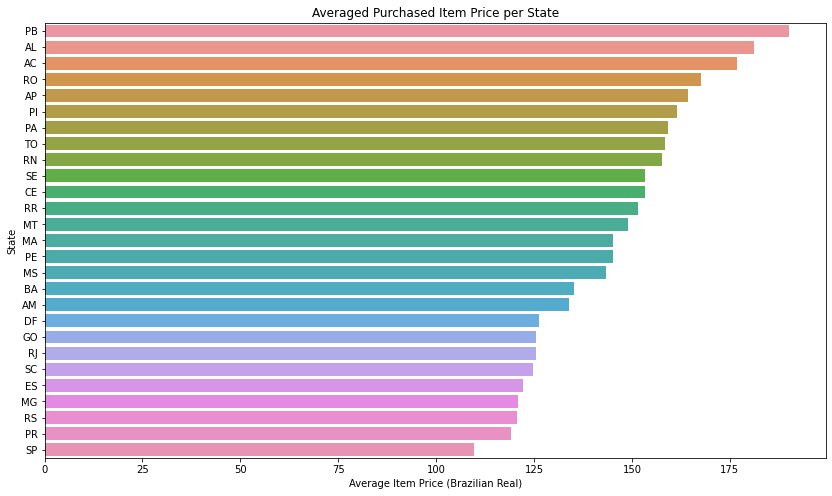

In [76]:
# Plot averaged purchased item price per state
averaged_data = revenue_df.groupby('customer_state')['price'].mean()
averaged_data = pd.DataFrame(averaged_data)
averaged_data = averaged_data.sort_values(by='price', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=averaged_data, y=averaged_data.index, x='price', orient='h')

plt.title("Averaged Purchased Item Price per State")
plt.xlabel("Average Item Price (Brazilian Real)")
plt.ylabel("State")
plt.show()

Given the plot above, we can see the averaged purchased item prices are somewhat similar for each state, with Paraíba having the highest. It is interesting that Paraíba's total revenue was quite low, however, the customers seem to purchase more expensive items. On the other hand, São Paulo seems to have sold the least valuable goods on average, but the sheer number of purchases causes the state to have the highest revenue.

Next, we will take a look at the average purchased item price per category.

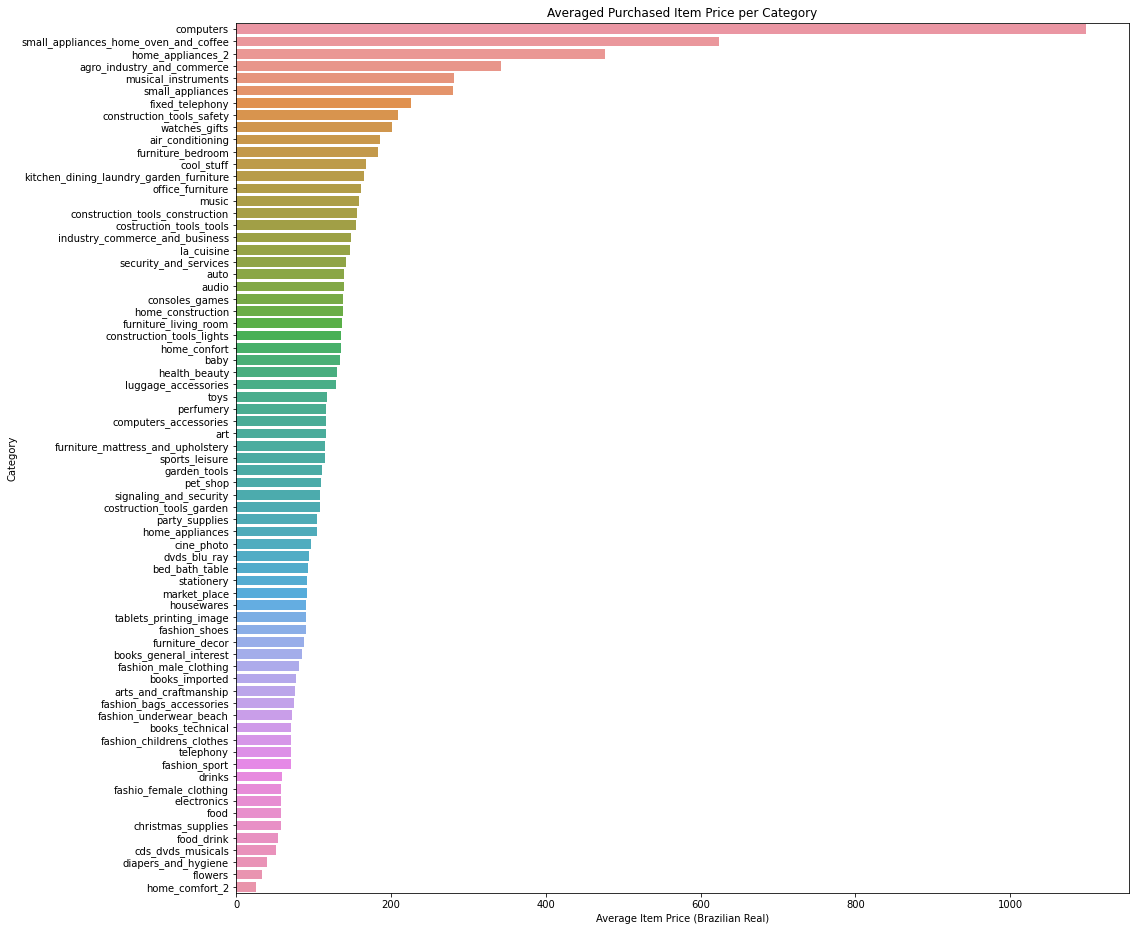

In [77]:
# Plot averaged purchased item price per category
averaged_data2 = merged_data.groupby('product_category_name_english')['price'].mean()
averaged_data2 = pd.DataFrame(averaged_data2)
averaged_data2 = averaged_data2.sort_values(by='price', ascending=False)

plt.figure(figsize=(16,16))
sns.barplot(data=averaged_data2, y=averaged_data2.index, x='price', orient='h')

plt.title("Averaged Purchased Item Price per Category")
plt.xlabel("Average Item Price (Brazilian Real)")
plt.ylabel("Category")
plt.show()

The bar plot above shows that the most valuable categories include computers, home appliances, and agro_industry_and_commerce,  which is to be expected.

The next step was to investigate what categories were most popular per customer state.

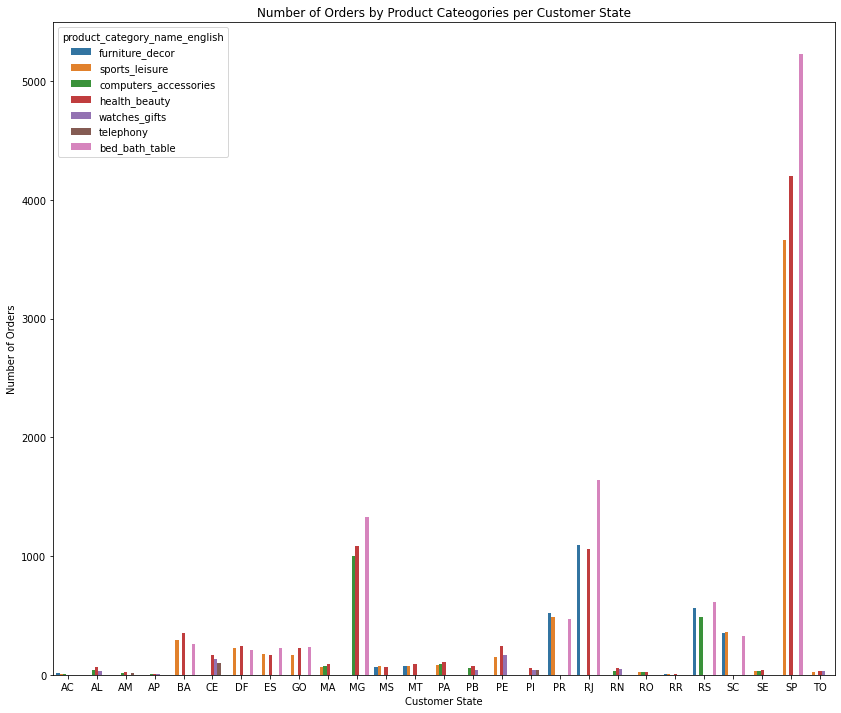

In [78]:
# Plot the Number of Orders by Product Cateogories per Customer State
columns = ['customer_state', 'product_category_name_english']
new_df = merged_data[columns]

# group by customer_state and count product_category_name values
grouped = new_df.groupby(['customer_state', 'product_category_name_english']).size().reset_index(name='count')
states = grouped['customer_state'].unique()
newdf = pd.DataFrame({'customer_state': [],
                   'product_category_name_english': [],
                   'count': []})

for state in states:
    a = grouped[grouped['customer_state'] == state]
    a = a.sort_values('count', ascending=False)
    newdf = pd.concat([newdf, a.head(3)], ignore_index=True)


# create the bar plot
plt.figure(figsize=(14,12))
sns.barplot(data=newdf, x='customer_state', y='count', hue='product_category_name_english')
plt.xlabel('Customer State')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Product Cateogories per Customer State')
plt.show()

This bar plot shows that in São Paulo, the most purchased categories were bed_bath_table, health_beauty and sports_leisure. From the previous analysis, we found that these categories are not very valuable, therefore, the revenue in this state was created because of the volume sold (which is also supported by this chart). This is a very similar case with The State of Rio de Janeiro and Minas Gerai, as the second and third revenue by state. 

Next, we wanted to take an even deeper look into the most popular categories purchased per state, so we counted how many times a specific category was included in the plot above.

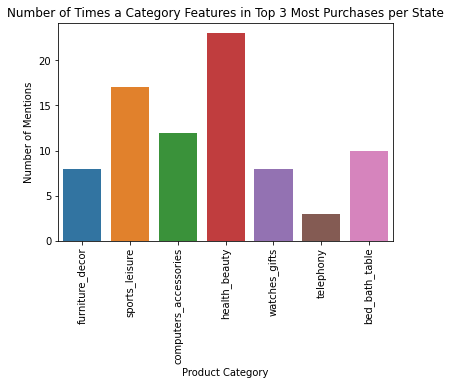

In [79]:
# Counting the number of times a cateogroy appears in the plot above
sns.countplot(x="product_category_name_english", data=newdf)
plt.title("Number of Times a Category Features in Top 3 Most Purchases per State")
plt.xlabel("Product Category")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=90)
plt.show()

This bar plot shows that health_beauty was more than 20 times in the top 3 categories purchased per state, closely followed by spots_leisure and computers_accessories.

### Summary ###
In the steps above, we attempted to gain a deeper understanding of the purchase patterns across different states, the most popular categories, how valuable the items are and how much revenue they generate.<br> Generally, revenue is created by selling less valuable items (items with a lower price per piece) in high volumes. The states of São Paulo, Rio de Janeiro and Minas Gerais are the biggest contributors to the business's overall success.<br> The most purchased high-value category is computer_accessories, perhaps also including headsets, monitors, and more. This category is both popular and valuable, therefore, it is important for the overall profit.
<br>_[Go to top](#top-of-page)_

<a id="2b-customer-satisfaction-analysis"></a>
## b) Customer Satisfaction Analysis ##
Understanding correlations between the order reviews and other variables, including review creation time, etc., will be useful for subtask 5: Sentiment Analysis.

First, we would like to understand the relationship between the customer's review rating and when the order was delivered.

In [80]:
# Merge datasets
merged_data_reviews = pd.merge(order_data, order_reviews_data, on='order_id', how='inner')
merged_data_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,2017,10,0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"I haven't tested the product yet, but it arriv...",2017-10-11,2017-10-12 03:43:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,2018,7,1,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,The product is very good.,2018-08-08,2018-08-08 18:37:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,2018,8,2,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,2017,11,5,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,The product was exactly what I expected and wa...,2017-12-03,2017-12-05 19:21:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2018,2,1,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:00


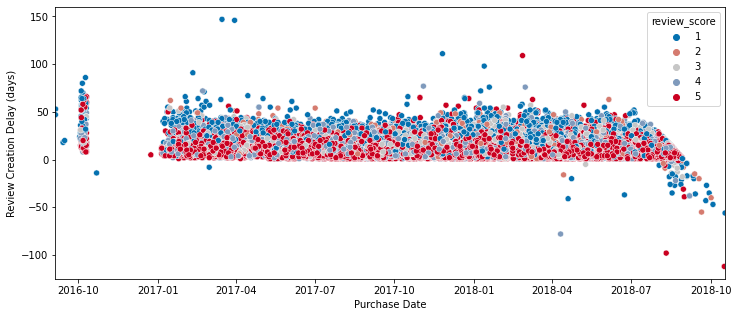

In [81]:
# Plot purchase date vs. review creation delay
# calculate difference is time between order purchased and order reviewed 
merged_data_reviews['review_creation_delay'] = (merged_data_reviews['review_creation_date'] - merged_data_reviews['order_purchase_timestamp']).dt.days

# plot results
sns.scatterplot(x='order_purchase_timestamp', 
                y='review_creation_delay', 
                hue='review_score', 
                palette=reviews_palette, 
                data=merged_data_reviews
               ).set(xlabel='Purchase Date', 
                     ylabel='Review Creation Delay (days)',
                     xlim=(merged_data_reviews['order_purchase_timestamp'].min(),
                           merged_data_reviews['order_purchase_timestamp'].max())
                    );
resize_plot()

Based on the graph above, positive reviews were created close to the purchase date. Negative reviews took more time to be completed. This suggests that satisfied customers wanted to voice their opinions more or more quicker than unsatisfied customers.

Furthermore, we would expect that all reviews were created AFTER a purchase date, but the graphs suggest that is only sometimes the case. We can see some negative values, which means some reviews were made before the purchase date. Upon further investigation, we found that most negative values (except for 7 single values) are cancelled shipments. The reasoning for this is unclear, it mistakes in the data. For example, the day and month could have been switched somewhere along the way.

Next, we will plot a line of the number of reviews and the review score through time to gain a deeper understanding of overall customer satisfaction.

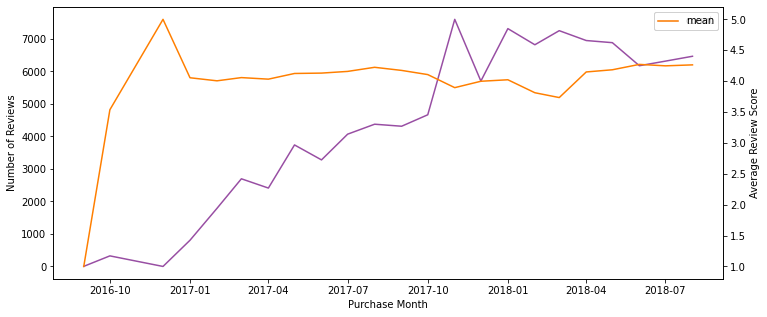

In [82]:
# plot number of reviews and the review score through time
merged_data_reviews['year_month'] = merged_data_reviews['order_purchase_timestamp'].dt.to_period('M') # merge datasets
reviews_timeseries = merged_data_reviews[merged_data_reviews['review_creation_delay'] > 0].groupby('year_month')['review_score'].agg(['count', 'mean'])

# plot first line
ax = sns.lineplot(
 x=reviews_timeseries.index.to_timestamp(),
 y='count',
 data=reviews_timeseries,
 color='#984ea3',
 label='count'
)
ax.set(xlabel='Purchase Month', ylabel='Number of Reviews')

# plot second line
sns.lineplot(
 x=reviews_timeseries.index.to_timestamp(),
 y='mean',
 data=reviews_timeseries,
 ax=ax.twinx(),
 color='#ff7f00',
 label='mean'
).set(ylabel='Average Review Score');
resize_plot()

The line plot above suggests that both the review count and the mean score of the reviews increased over time, except for a visible spike in the high number of negative reviews towards the end of 2016. Beginning in 2017, the number of reviews seems relatively steady, but the review score oscillates more.

We also plotted the relationship between the order status and the review count to understand better the customer opinions.

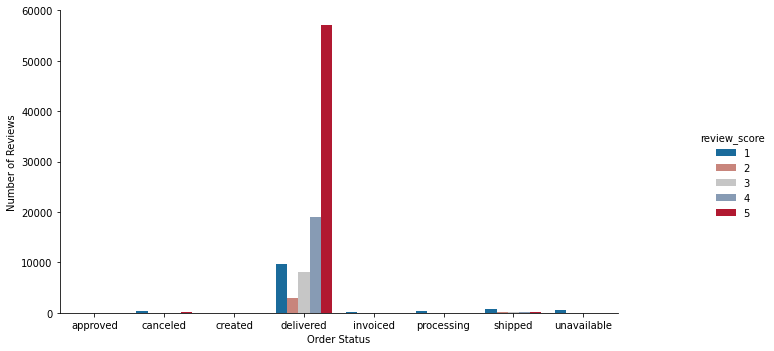

In [83]:
# plot order status vs. review count
merged_data_reviews.groupby('order_status')['order_status'].count()
ax = sns.catplot(
 x='order_status',
 kind='count',
 hue='review_score',
 data=merged_data_reviews,
 palette=reviews_palette
).set(xlabel='Order Status', ylabel='Number of Reviews');
resize_plot()

We can see that the delivered orders take over the plot in a way that it becomes unreadable. Therefore, we will exclude the 'delivered' status. However, we can still see that most reviews are 5-star, which supports our previous investigations.

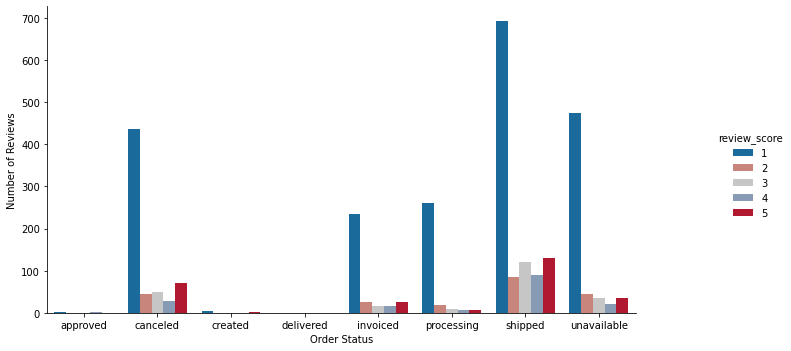

In [84]:
# plot order status vs. review count excl. delivery status
merged_data_reviews.groupby('order_status')['order_status'].count()
ax = sns.catplot(
 x='order_status',
 kind='count',
 hue='review_score',
 data=merged_data_reviews[merged_data_reviews['order_status'] != 'delivered'],
 palette=reviews_palette
).set(xlabel='Order Status', ylabel='Number of Reviews');
resize_plot()

The plot now shows that customers were unsatisfied when their orders were not delivered. A high number of 1-star reviews can be seen in the 'shipped' column, as the delivery time was too long for a customer to be happy with their purchase.<br>
Surprisingly, we can also see some positive reviews despite the fact that the products had yet to be delivered to the customer. This may be that they received the product, yet it does not show in the system.

End of subtask 1